In [7]:
import os
import json
path="/mnt/c/Users/kacper/Desktop/experiments"
results = {}
for el in os.listdir(path):
    with open(path+"/"+el) as f:
        results[el] = json.load(f)

In [10]:
import os
import json
path="experiments"
results = {}
for el in os.listdir(path):
    with open(path+"/"+el) as f:
        results[el] = json.load(f)

In [11]:
import pandas as pd
res_df = pd.DataFrame.from_dict(results).transpose()
res_df["epochs"] = res_df["trajectory"].apply(len)
res_df

,name,run,best_accuracy_validation,time_generated,trajectory,augment,epochs
arch_vgg11fatclassifier_10_report.json,vgg11_fat_classifier,10,0.8212,2023-03-16T08:35:47.751628,"[{'epoch': 0, 'train': 0.30733333333333335, 'v...",NaN,28
arch_vgg11fatclassifier_1_report.json,vgg11_fat_classifier,1,0.817,2023-03-16T06:56:18.770802,"[{'epoch': 0, 'train': 0.34771111111111114, 'v...",NaN,23
arch_vgg11fatclassifier_2_report.json,vgg11_fat_classifier,2,0.8202,2023-03-16T07:06:36.186440,"[{'epoch': 0, 'train': 0.2871111111111111, 'va...",NaN,30
arch_vgg11fatclassifier_3_report.json,vgg11_fat_classifier,3,0.8298,2023-03-16T07:18:59.518958,"[{'epoch': 0, 'train': 0.2554888888888889, 'va...",NaN,36
arch_vgg11fatclassifier_4_report.json,vgg11_fat_classifier,4,0.8316,2023-03-16T07:32:13.924439,"[{'epoch': 0, 'train': 0.32711111111111113, 'v...",NaN,39
...,...,...,...,...,...,...,...
aug_smallrotate_arch_vgg16_5_report.json,vgg16,5,0.8436,2023-03-19T16:28:29.334444,"[{'epoch': 0, 'train': 0.28504444444444443, 'v...",smallrotate,22
aug_smallrotate_arch_vgg16_6_report.json,vgg16,6,0.8318,2023-03-19T20:59:57.056565,"[{'epoch': 0, 'train': 0.26382222222222224, 'v...",smallrotate,27
aug_smallrotate_arch_vgg16_7_report.json,vgg16,7,0.854,2023-03-19T23:39:28.236495,"[{'epoch': 0, 'train': 0.22435555555555556, 'v...",smallrotate,34
aug_smallrotate_arch_vgg16_8_report.json,vgg16,8,0.8598,2023-03-20T02:33:06.595431,"[{'epoch': 0, 'train': 0.24886666666666668, 'v...",smallrotate,46


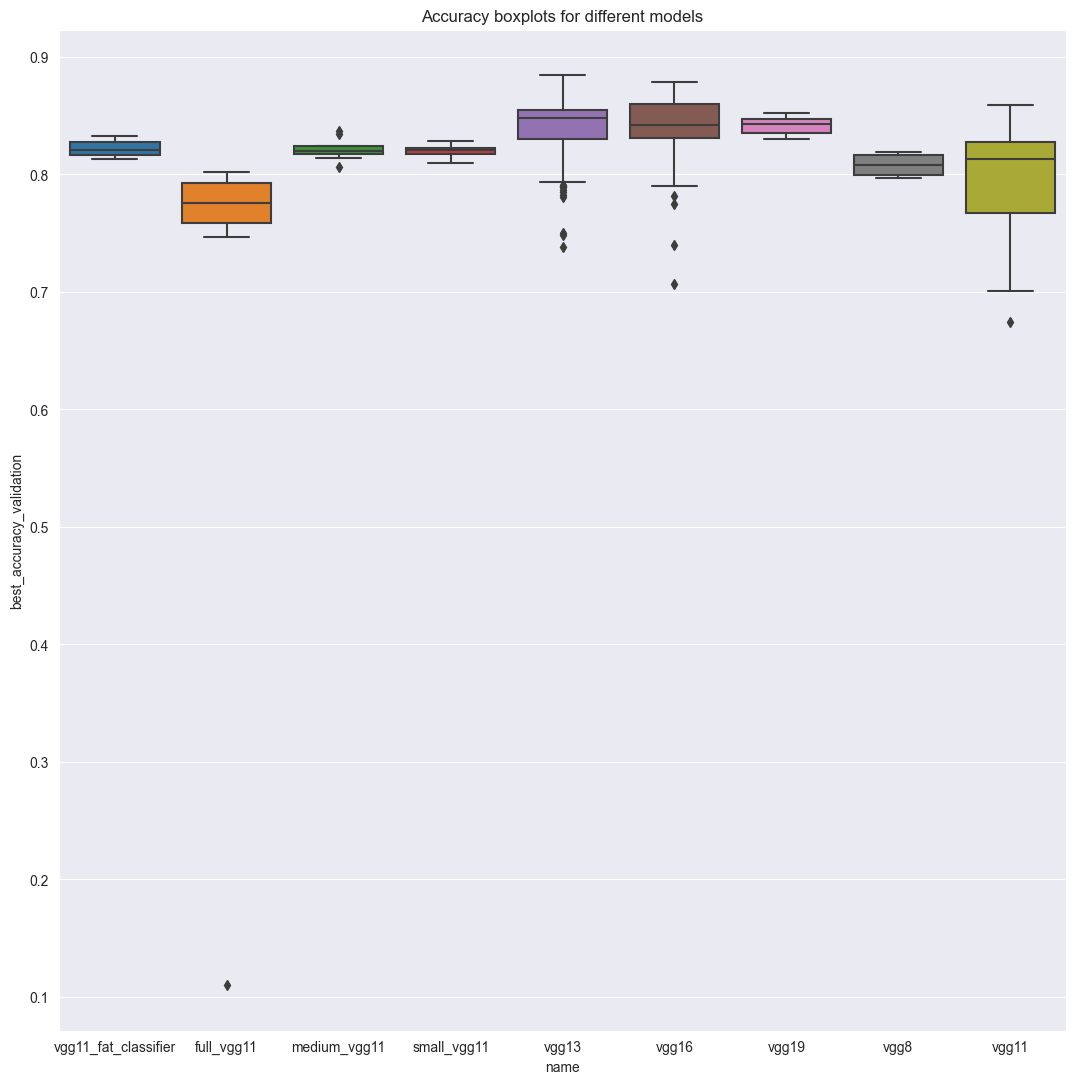

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(13,13))
sns.boxplot(y="best_accuracy_validation", x = "name", data= res_df)
plt.title("Accuracy boxplots for different models")
plt.show()

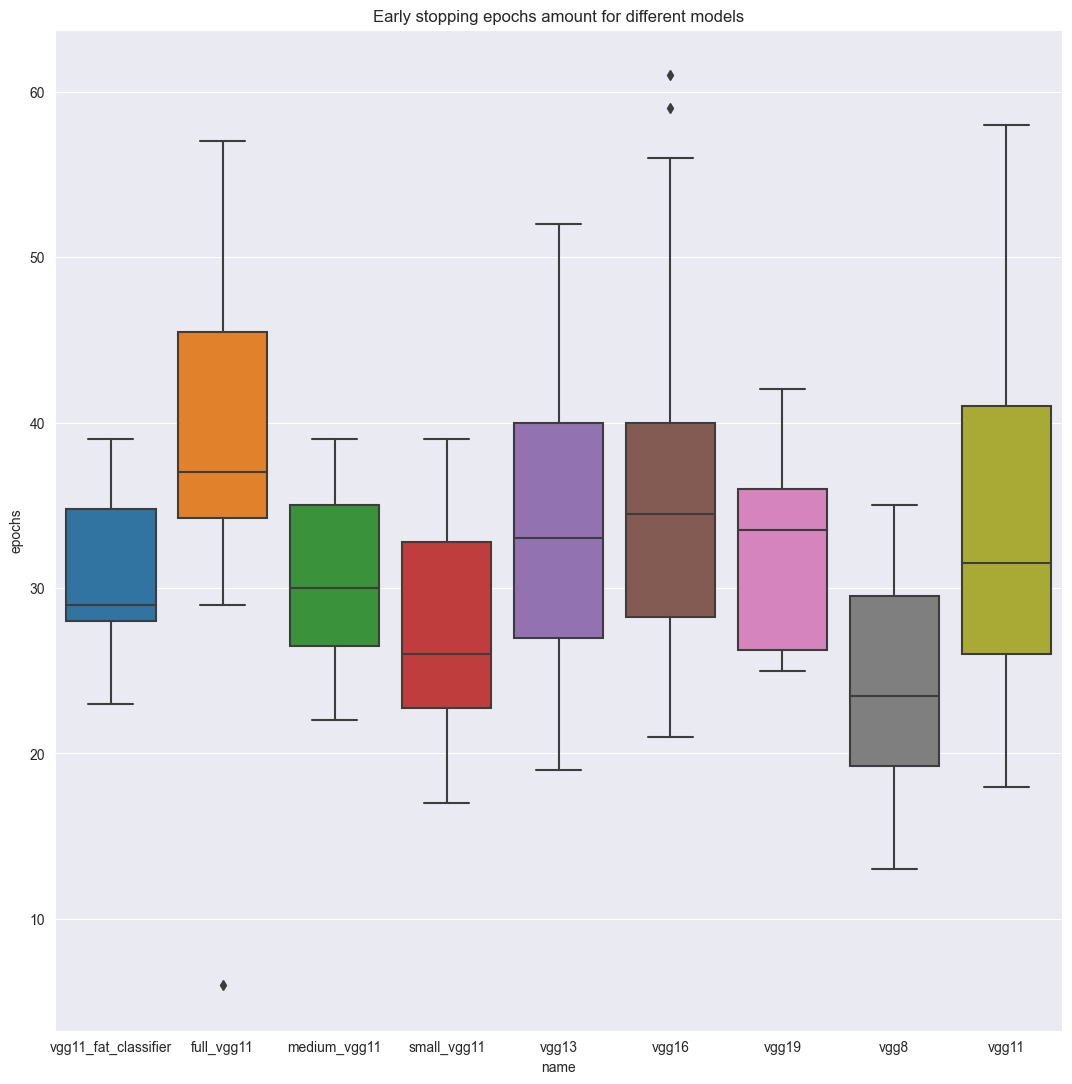

In [19]:
plt.figure(figsize=(13,13))
sns.boxplot(y="epochs", x = "name", data= res_df)
plt.title("Early stopping epochs amount for different models")
plt.show()

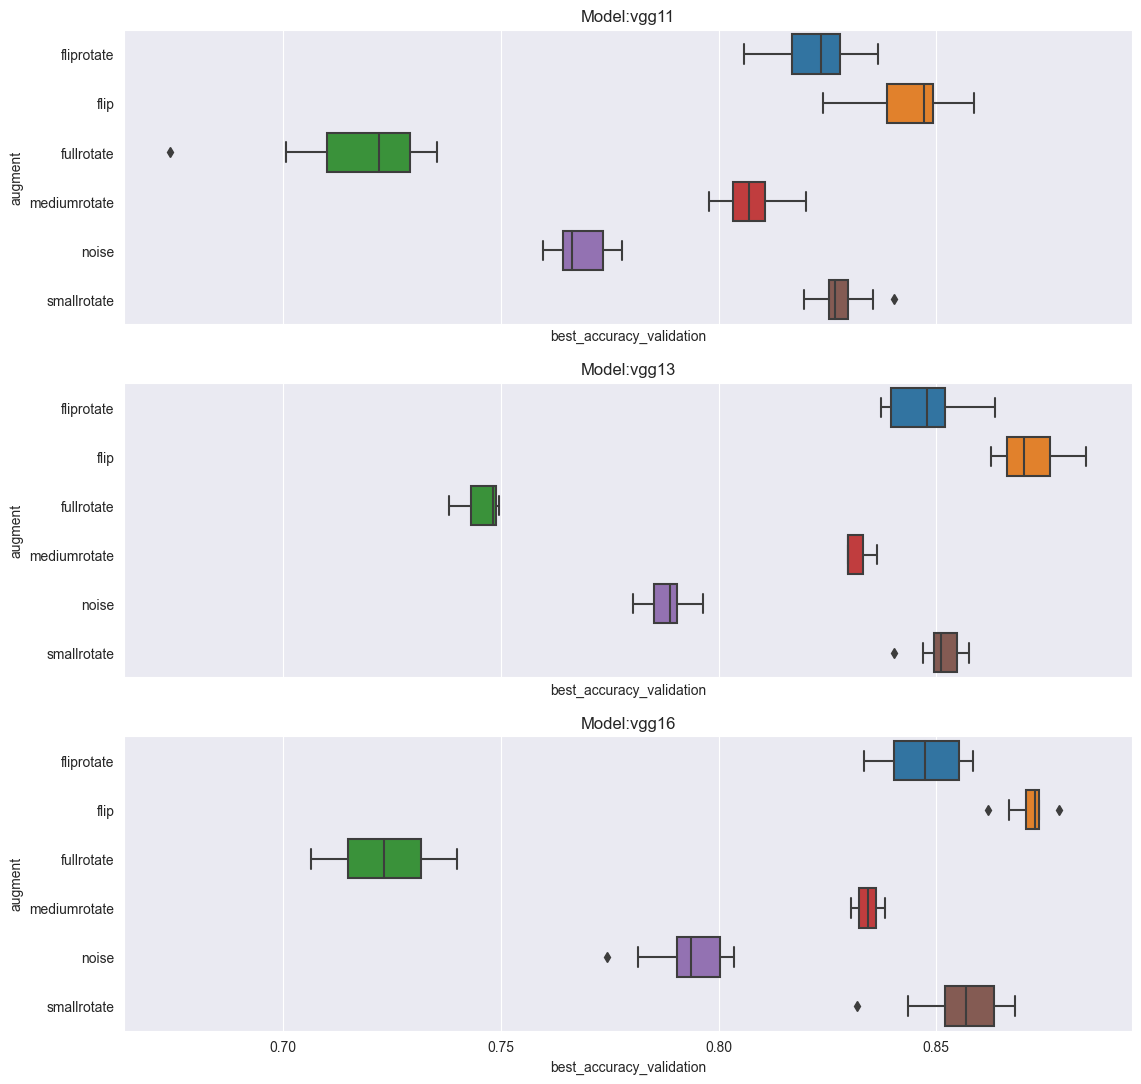

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(13,13), sharex='col')
for i, name in enumerate(["vgg11", "vgg13", "vgg16"]):
    sns.boxplot(y="augment", x="best_accuracy_validation", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
plt.show()

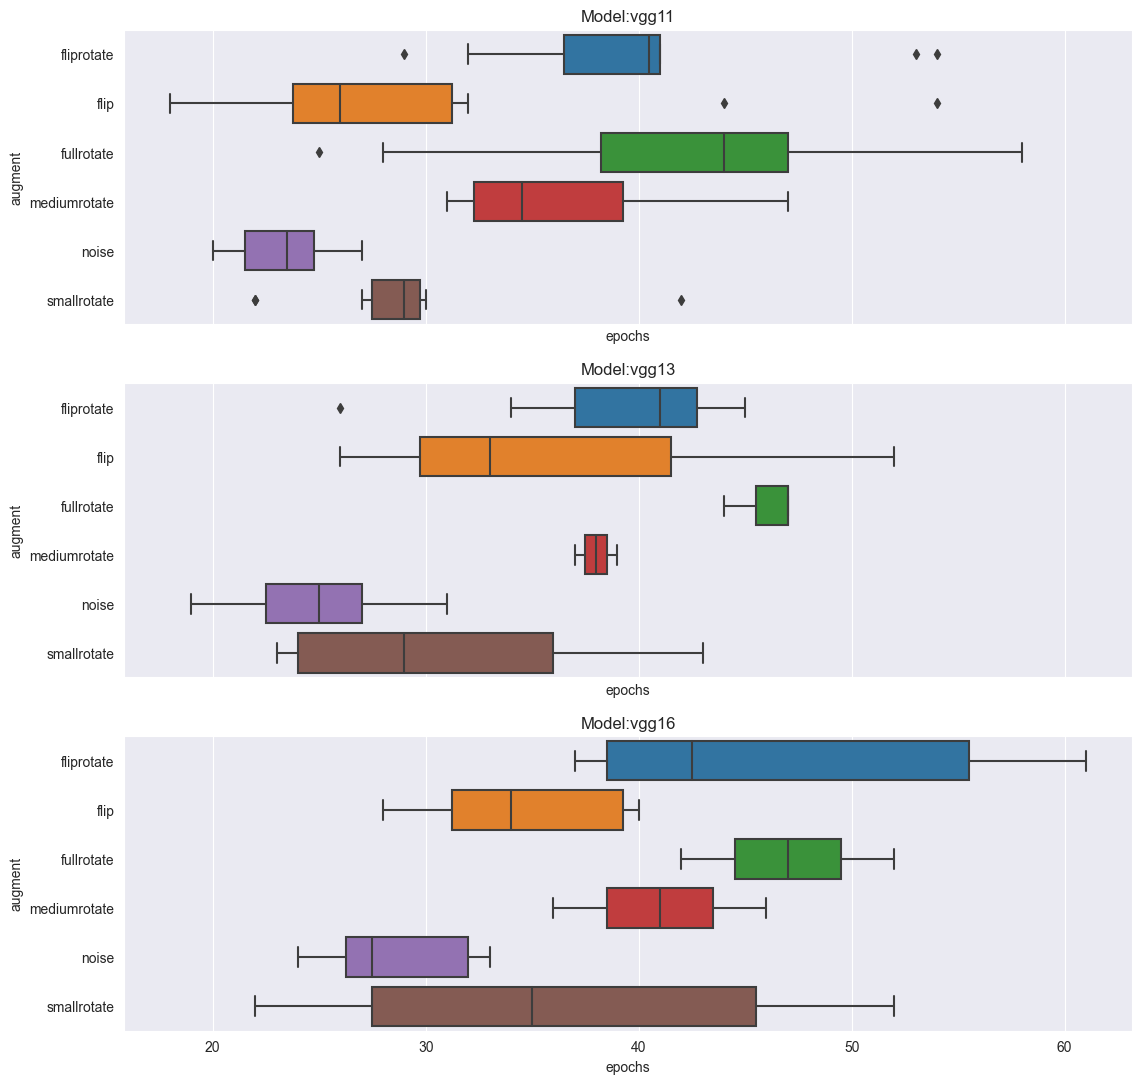

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(13,13), sharex='col')
for i, name in enumerate(["vgg11", "vgg13", "vgg16"]):
    sns.boxplot(y="augment", x="epochs", data=res_df.loc[res_df['name'] == name], ax=ax[i])
    ax[i].title.set_text('Model:{}'.format(name))
plt.show()

<Axes: xlabel='name', ylabel='best_accuracy_validation'>

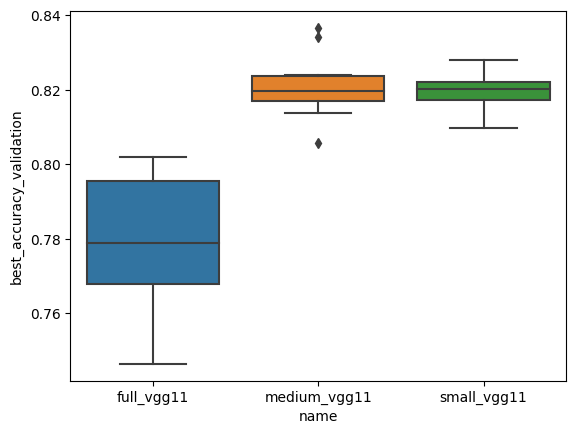

In [31]:
# Legacy
sns.boxplot(y="best_accuracy_validation", x = "name", data= res_df.drop("full_vgg11_6_report.json"))

<Axes: xlabel='name', ylabel='epochs'>

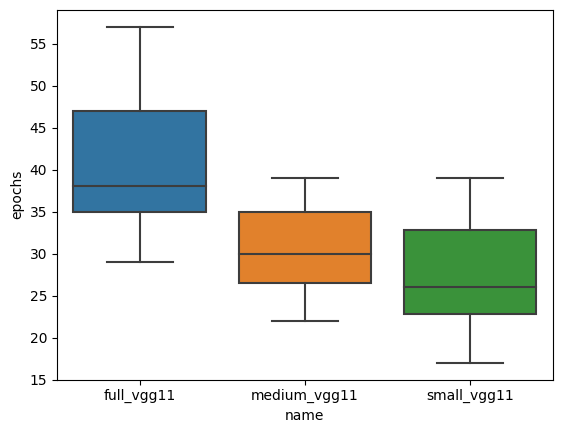

In [33]:
# Legacy
sns.boxplot(y="epochs", x = "name", data= res_df.drop("full_vgg11_6_report.json"))